# Simple Linear Regression. Minimal Example

### Import the relavant libraries

In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D # Nice 3D graphs

### Generate random input dara to train on

In [29]:
observations = 1000
# np.random.uniform(low, high, size) draws a random value from the interval (low,high), where each number has an equal chance to be selected
x = np.random.uniform(-10,10, (observations,1))
z = np.random.uniform(-10,10, (observations,1))

inputs = np.column_stack((x,z)) # np.column_stack() takes a sequence of 1D arrays and stacks them into a single 2D array

inputs.shape

(1000, 2)

### Create the targets we will aim at

In [30]:
noise = np.random.uniform(-1,1,(observations,1))
targets = 2*x - 3*z + 5 + noise

targets.shape

(1000, 1)

### Plot the training data

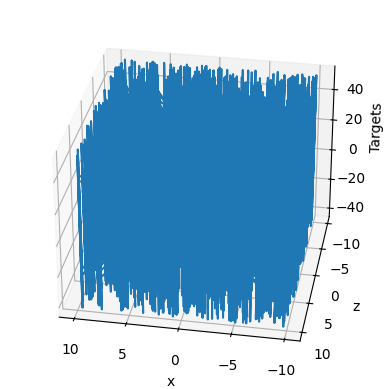

In [31]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, z, targets)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,)

### Initialize variables

In [32]:
init_range = 0.1

weights = np.random.uniform(-init_range, init_range,(2,1))
biases = np.random.uniform(-init_range, init_range,1)

print(weights)
print(biases)

[[-0.09650886]
 [ 0.06498847]]
[0.00958264]


### Set the learning rate

In [33]:
learning_rate = 0.02

### Train the model

In [34]:
for i in range(100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2) / 2  / observations
    
    print(loss)
    
    deltas_scaled = deltas / observations # Another way to make the algorithm more universal
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled) # Updating the weights follow the gradient decent logic
    
    biases = biases - learning_rate * np.sum(deltas_scaled)

232949.28845402304
4911870.375791458
1694195535.2712436
611552839565.8883
220780352767832.03
7.970526571008909e+16
2.877488557543891e+19
1.038819747359629e+22
3.7503067203347975e+24
1.353921171823781e+27
4.887873649302576e+29
1.7646011679811483e+32
6.370494627013788e+34
2.2998512371632437e+37
8.302833645996991e+39
2.997456767600769e+42
1.0821302047846543e+45
3.906664452226866e+47
1.4103688331415e+50
5.091658804643621e+52
1.8381708935781534e+55
6.636093194061551e+57
2.3957366006675733e+60
8.648995262625888e+62
3.122426690483438e+65
1.1272463611551731e+68
4.0695410483467305e+70
1.4691699095136198e+73
5.303940167644071e+75
1.914807887078316e+78
6.912765092608367e+80
2.4956196153181116e+83
9.009589044216294e+85
3.252606857528463e+88
1.1742434996447096e+91
4.239208293084617e+93
1.5304225194855115e+96
5.52507196206702e+98
1.994640028969338e+101
7.200971991826049e+103
2.599666951126869e+106
9.385216696374732e+108
3.3882144941578107e+111
1.2232000421317394e+114
4.415949302061513e+116
1.5942288

In [35]:
print(weights, biases)

[[3.95764199e+124 3.95764199e+124 3.95764199e+124 ... 3.95764199e+124
  3.95764199e+124 3.95764199e+124]
 [4.06780446e+124 4.06780446e+124 4.06780446e+124 ... 4.06780446e+124
  4.06780446e+124 4.06780446e+124]] [-3.83497234e+128]


### Plot last outputs vs targets

Since they are the last ones at the end of the training, they represent the final model accuracy.
The closer this plot is to a 45 degree line, the closer target and output values are.

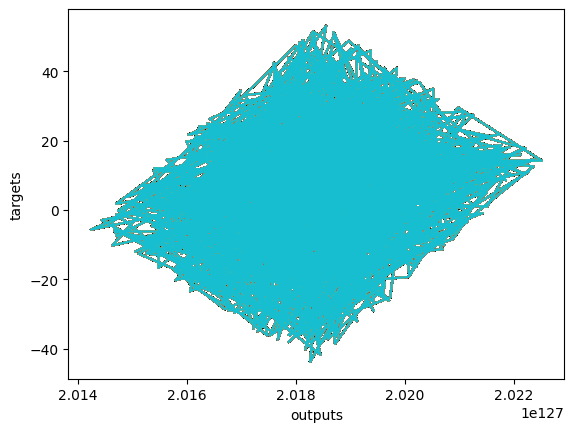

In [36]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()